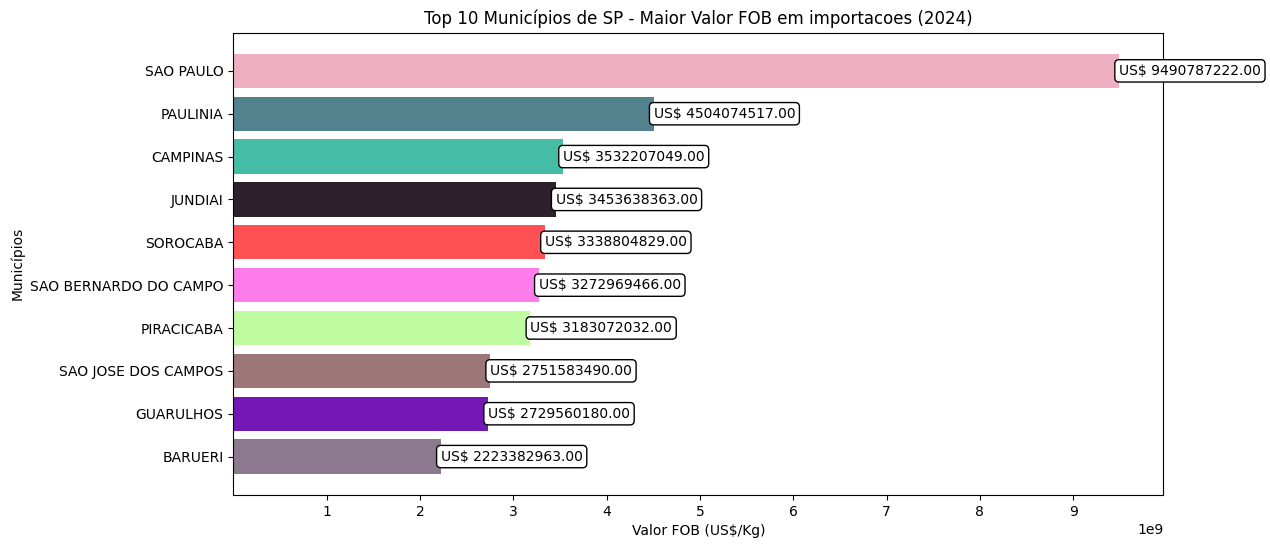

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib.ticker import MaxNLocator

# Carregar os arquivos CSV
importacoes2024 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/IMP_2024_MUN.csv'
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'

df = pd.read_csv(importacoes2024, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1")
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1")

# Filtrar dados para o estado de São Paulo (SP)
df_sp = df[df["SG_UF_MUN"] == "SP"]

# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_sp = df_sp[df_sp["KG_LIQUIDO"] > 0]

# Agrupar por município e somar o valor FOB
fob_por_municipio = df_sp.groupby("CO_MUN")["VL_FOB"].sum().reset_index()

# Renomear coluna para compatibilidade com a base de municípios
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})

# Mesclar com os nomes dos municípios
fob_por_municipio = fob_por_municipio.merge(df_mun, on="CO_MUN", how="left")

# Selecionar as 10 cidades com maior valor FOB
fob_top10 = fob_por_municipio.sort_values(by="VL_FOB", ascending=False).head(10)

# Criar cores aleatórias para cada barra
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(fob_top10))]

# Criar gráfico de barras com cores variadas
plt.figure(figsize=(12, 6))
bars = plt.barh(fob_top10["NO_MUN"], fob_top10["VL_FOB"], color=colors)

# Adicionar uma caixa de texto com o valor real no meio de cada barra
for bar in bars:
    width = bar.get_width()  # O valor da barra no eixo X
    y_position = bar.get_y() + bar.get_height() / 2  # A posição no meio da barra no eixo Y
    plt.text(width, y_position, f'US$ {width:.2f}', va='center', ha='left', color='black', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajuste do eixo X para mostrar de 1000 em 1000
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))

# Adicionar rótulos e título
plt.xlabel("Valor FOB (US$/Kg)")
plt.ylabel("Municípios")
plt.title("Top 10 Municípios de SP - Maior Valor FOB em importacoes (2024)")

# Inverter a ordem do eixo Y para mostrar o maior valor no topo
plt.gca().invert_yaxis()

# Salvar o gráfico como imagem antes de exibir
plt.savefig("/content/export_2024.jpg", format="jpg", dpi=300, bbox_inches="tight")

# Exibir o gráfico
plt.show()